In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np


In [2]:
#Explore the dataset
df_fighters = pd.read_csv('ufc_fighters.csv')
df_fighters.head()

,First Name,Last Name,Nickname,Height,Weight,Reach,Stance,Wins,Losses,Draws
0,Tom,Aaron,NaN,--,155 lbs.,--,NaN,5,3,0
1,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0
2,Nariman,Abbasov,Bayraktar,"5' 8""",155 lbs.,"66.0""",Orthodox,28,4,0
3,David,Abbott,Tank,"6' 0""",265 lbs.,--,Switch,10,15,0
4,Hamdy,Abdelwahab,The Hammer,"6' 2""",264 lbs.,"72.0""",Southpaw,5,0,0


In [3]:
#Check if there are null values and replace them with NaN values.
df_fighters.replace('--', np.nan, inplace=True)
df_fighters.fillna(0, inplace=True)
print(df_fighters.isna().sum())

First Name    0
Last Name     0
Nickname      0
Height        0
Weight        0
Reach         0
Stance        0
Wins          0
Losses        0
Draws         0
dtype: int64


In [4]:
df_fighters.head()

,First Name,Last Name,Nickname,Height,Weight,Reach,Stance,Wins,Losses,Draws
0,Tom,Aaron,0,0,155 lbs.,0,0,5,3,0
1,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,0,Orthodox,4,6,0
2,Nariman,Abbasov,Bayraktar,"5' 8""",155 lbs.,"66.0""",Orthodox,28,4,0
3,David,Abbott,Tank,"6' 0""",265 lbs.,0,Switch,10,15,0
4,Hamdy,Abdelwahab,The Hammer,"6' 2""",264 lbs.,"72.0""",Southpaw,5,0,0


In [5]:
#Check if there are NaN values
print(df_fighters.isna().any())

First Name    False
Last Name     False
Nickname      False
Height        False
Weight        False
Reach         False
Stance        False
Wins          False
Losses        False
Draws         False
dtype: bool


In [32]:
#in case of finding NaN value in the height column, replace it with 0
df_fighters['Height'] = df_fighters['Height'].dropna()

In [7]:
df_fighters[['feet', 'inches']] = df_fighters['Height'].str.split('\'', expand=True)
df_fighters['inches'] = df_fighters['inches'].str.replace('"', '') # Remove the inch symbol

In [8]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First Name  3960 non-null   object
 1   Last Name   3960 non-null   object
 2   Nickname    3960 non-null   object
 3   Height      3960 non-null   object
 4   Weight      3960 non-null   object
 5   Reach       3960 non-null   object
 6   Stance      3960 non-null   object
 7   Wins        3960 non-null   int64 
 8   Losses      3960 non-null   int64 
 9   Draws       3960 non-null   int64 
 10  feet        3655 non-null   object
 11  inches      3655 non-null   object
dtypes: int64(3), object(9)
memory usage: 371.4+ KB


In [9]:
df_fighters['feet'] = df_fighters['feet'].dropna()

In [10]:
df_fighters = df_fighters.drop(0)

In [34]:
#convert feet and inches into numeric values
df_fighters.dropna(subset=['feet'], inplace=True)
df_fighters['feet'] = df_fighters['feet'].astype(int)
df_fighters.dropna(subset=['inches'], inplace=True)
df_fighters['inches'] = df_fighters['inches'].astype(int)

In [35]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3649 entries, 1 to 3959
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   First Name    3649 non-null   object 
 1   Last Name     3649 non-null   object 
 2   Nickname      3649 non-null   object 
 3   Height        3649 non-null   object 
 4   Weight        3649 non-null   float64
 5   Reach         2013 non-null   Int64  
 6   Stance        3649 non-null   object 
 7   Wins          3649 non-null   int64  
 8   Losses        3649 non-null   int64  
 9   Draws         3649 non-null   int64  
 10  feet          3649 non-null   int64  
 11  inches        3649 non-null   int64  
 12  total_inches  3649 non-null   int64  
dtypes: Int64(1), float64(1), int64(6), object(5)
memory usage: 402.7+ KB


In [33]:
df_fighters[['feet','inches']].head()

,feet,inches
1,5,11
2,5,8
3,6,0
4,6,2
5,6,3


In [36]:
## Calculate average height of fighters
# Convert feet and inches to total inches
df_fighters['total_inches'] = df_fighters['feet'] * 12 + df_fighters['inches']

# Calculate average height in inches
average_height_inches = df_fighters['total_inches'].mean()

# Convert average height from inches to feet and inches
feet = int(average_height_inches // 12)
inches = round(average_height_inches % 12)

# Print average height in feet and inches
print("Average height: {}' {}\"".format(feet, inches))


Average height: 5' 10"


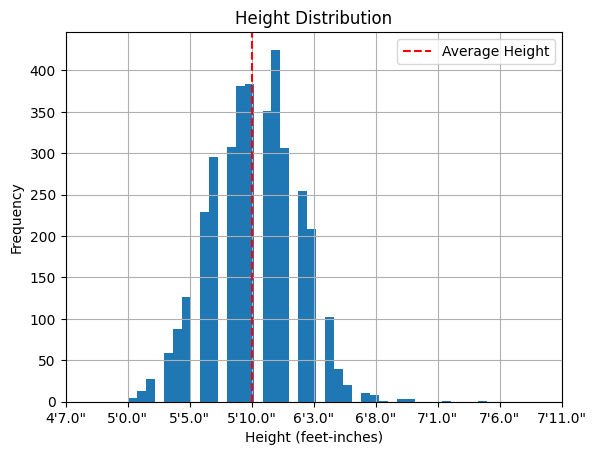

Average height: 5'10"


In [39]:
#Plot of height distribution

import matplotlib.pyplot as plt

# Convert feet and inches to total inches
df_fighters['total_inches'] = df_fighters['feet'] * 12 + df_fighters['inches']

# Calculate average height in inches
average_height_inches = df_fighters['total_inches'].mean()

# Convert average height to feet and inches
average_height_feet = int(average_height_inches // 12)
average_height_inches = int(average_height_inches % 12)

# Create histogram
plt.hist(df_fighters['total_inches'], bins=40)
plt.xlabel('Height (feet-inches)')
plt.ylabel('Frequency')
plt.title('Height Distribution')
plt.axvline(x=average_height_inches + average_height_feet*12, color='red', linestyle='--', label='Average Height')
plt.legend()

# Modify x-axis labels
xticks = plt.xticks()[0]
xticks_feet = [int(xtick/12) for xtick in xticks]
xticks_inches = [xtick%12 for xtick in xticks]
xticks_labels = [f"{feet}'{inches}\"" for feet, inches in zip(xticks_feet, xticks_inches)]
plt.xticks(xticks, xticks_labels)
plt.grid()
plt.show()

# Print average height in feet and inches
print(f"Average height: {average_height_feet}'{average_height_inches}\"")


In [16]:
#Analyzing weight
print(df_fighters['Weight'].dtype)
# Convert the weight column to a numeric format
df_fighters['Weight'] = df_fighters['Weight'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else x)
df_fighters = df_fighters[df_fighters['Weight'] != 0]


object


In [17]:
# Mean weight of fighters
mean_weight = df_fighters['Weight'].mean()

# Output descriptive message
print("The mean weight of the fighters is {:.1f} lb".format(mean_weight))

The mean weight of the fighters is 171.6 lb


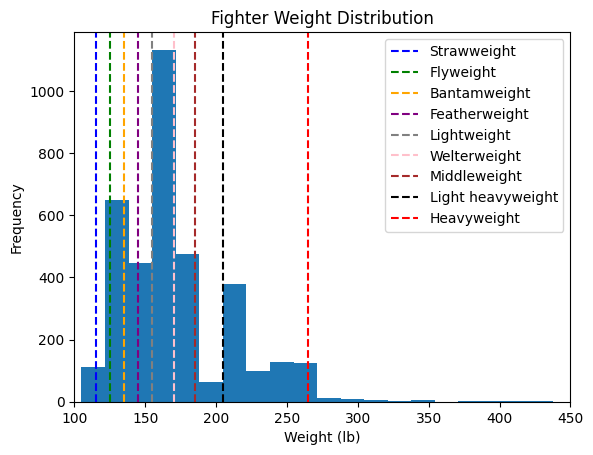

In [40]:
# Define weight class categories and corresponding weights and colors
weight_classes = {'Strawweight': {'weight': 115, 'color': 'blue'},
                  'Flyweight': {'weight': 125, 'color': 'green'},
                  'Bantamweight': {'weight': 135, 'color': 'orange'},
                  'Featherweight': {'weight': 145, 'color': 'purple'},
                  'Lightweight': {'weight': 155, 'color': 'gray'},
                  'Welterweight': {'weight': 170, 'color': 'pink'},
                  'Middleweight': {'weight': 185, 'color': 'brown'},
                  'Light heavyweight': {'weight': 205, 'color': 'black'},
                  'Heavyweight': {'weight': 265, 'color': 'red'}}

# Calculate mean weight of fighters
mean_weight = df_fighters['Weight'].mean()

# Plot histogram of fighter weights
plt.hist(df_fighters['Weight'], bins=40)
plt.xlabel('Weight (lb)')
plt.ylabel('Frequency')
plt.title('Fighter Weight Distribution')

# Add vertical lines for weight class categories
for weight_class, values in weight_classes.items():
    plt.axvline(x=values['weight'], color=values['color'], linestyle='--', label=weight_class)

# Set x-axis limits
plt.xlim(100, 450)

plt.legend()
plt.show()

In [19]:
# Find the heaviest fighter
heaviest_fighter = df_fighters.loc[df_fighters['Weight'].idxmax()]

# Find the lightest fighter
lightest_fighter = df_fighters.loc[df_fighters['Weight'].idxmin()]

# Print the results
print("Heaviest fighter:")
print(heaviest_fighter[['First Name', 'Last Name', 'Weight']])
print("\nLightest fighter:")
print(lightest_fighter[['First Name', 'Last Name', 'Weight']])

Heaviest fighter:
First Name      Emmanuel
Last Name     Yarborough
Weight             770.0
Name: 3901, dtype: object

Lightest fighter:
First Name           Nicdali
Last Name     Rivera-Calanoc
Weight                 105.0
Name: 2979, dtype: object


In [20]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3649 entries, 1 to 3959
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   First Name    3649 non-null   object 
 1   Last Name     3649 non-null   object 
 2   Nickname      3649 non-null   object 
 3   Height        3649 non-null   object 
 4   Weight        3649 non-null   float64
 5   Reach         3649 non-null   object 
 6   Stance        3649 non-null   object 
 7   Wins          3649 non-null   int64  
 8   Losses        3649 non-null   int64  
 9   Draws         3649 non-null   int64  
 10  feet          3649 non-null   int64  
 11  inches        3649 non-null   int64  
 12  total_inches  3649 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 528.1+ KB


In [42]:
#Correlation between height and weight

# Filter out fighters with weight 0 lbs
df_fighters = df_fighters[df_fighters['Weight'] != 0]

# Calculate the correlation coefficient between height and weight
corr_coeff = df_fighters['total_inches'].corr(df_fighters['Weight'])
print(corr_coeff)


0.7211908999716434


In [47]:
df_fighters['Stance'].isna().any()

False

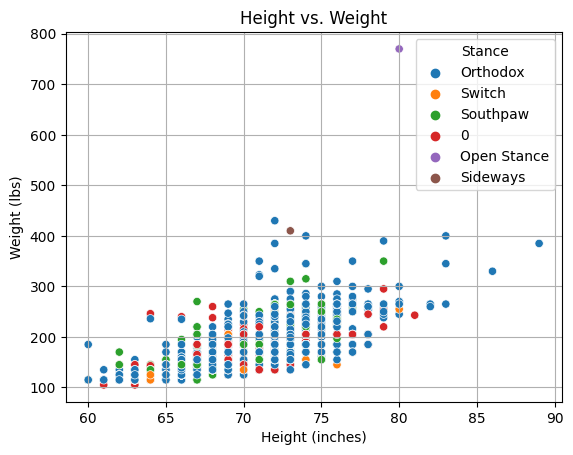

In [44]:
# Create a scatter plot of height vs. weight
sns.scatterplot(data=df_fighters, x='total_inches', y='Weight', hue='Stance')

# Add a title and labels to the plot
plt.title('Height vs. Weight')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')


# Show the plot
plt.grid()
plt.show()

In [23]:
# Filter the dataset to include only the stance column
stance_counts = df_fighters["Stance"].value_counts()

# Display the results in descending order
print(stance_counts)

Orthodox       2369
0               565
Southpaw        534
Switch          171
Open Stance       7
Sideways          3
Name: Stance, dtype: int64


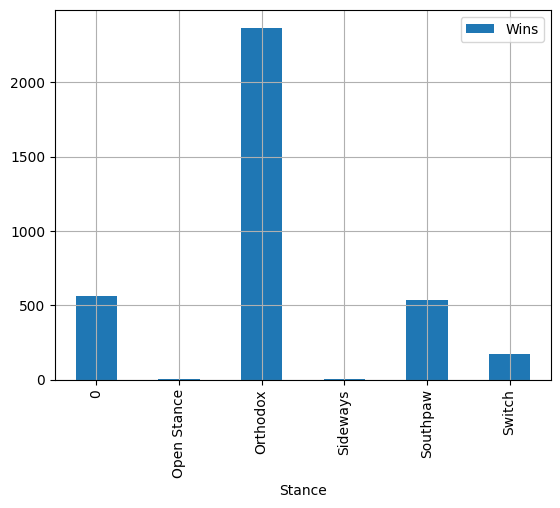

In [48]:
#Identify if there is a relationship between Stance and Number of Wins
# Filter the dataset to include only the stance and win columns
df_stance_win = df_fighters[["Stance", "Wins"]]

# Group the dataset by stance and calculate the mean number of wins for each stance
stance_win_mean = df_stance_win.groupby("Stance").count()

# Display the results in a bar chart
stance_win_mean.plot(kind="bar")
plt.grid()
plt.show()

total_inches    0
Weight          0
Reach           0
Stance          0
Wins            0
Losses          0
Draws           0
dtype: int64


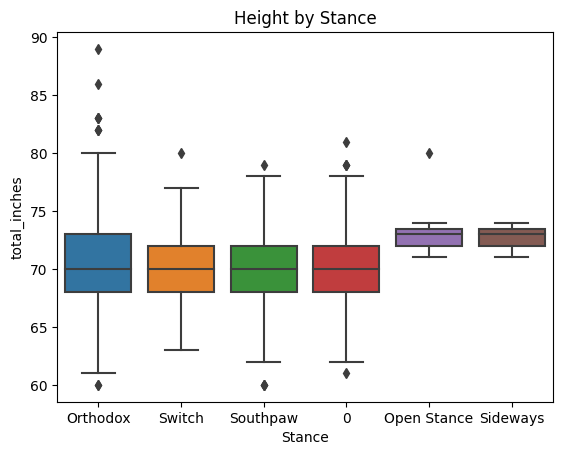

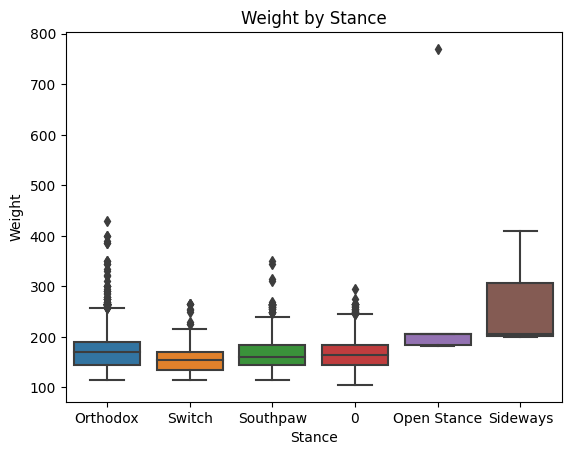

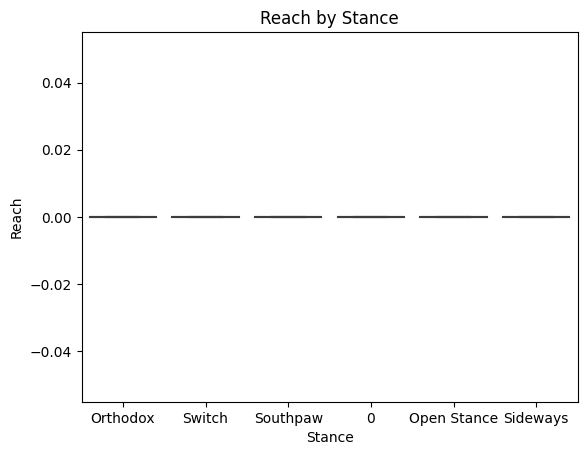

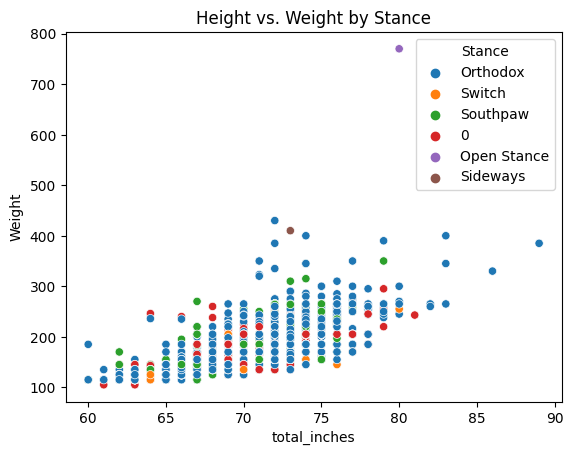

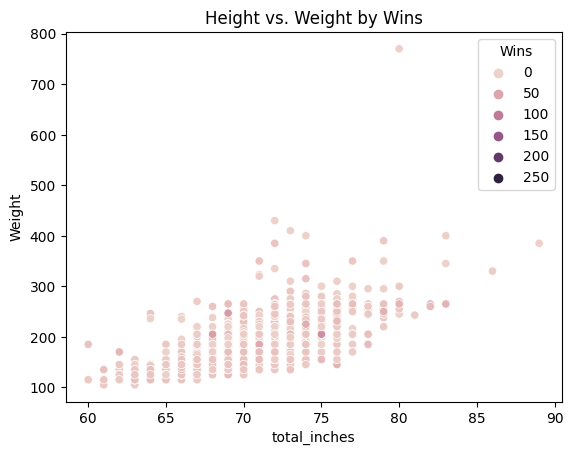

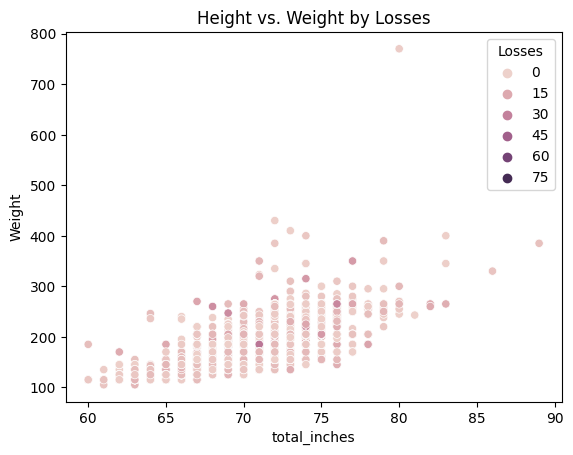

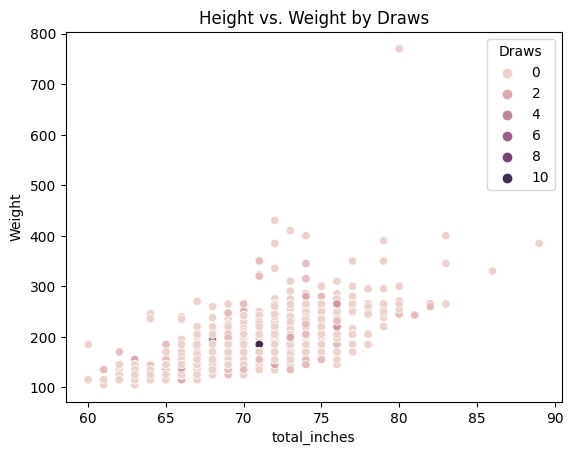

In [25]:
import seaborn as sns

# Filter the dataset to include only the relevant columns
df_attributes = df_fighters[["total_inches", "Weight", "Reach", "Stance", "Wins", "Losses", "Draws"]]

# Check for missing values
print(df_attributes.isnull().sum())

# Remove rows with missing values
df_attributes = df_attributes.dropna()

# Convert the Height, Weight, and Reach columns to numeric
df_attributes[["total_inches", "Weight", "Reach"]] = df_attributes[["total_inches", "Weight", "Reach"]].apply(pd.to_numeric, errors='coerce')

# Investigate the relationship between physical attributes and stance
sns.boxplot(x="Stance", y="total_inches", data=df_attributes)
plt.title("Height by Stance")
plt.show()

sns.boxplot(x="Stance", y="Weight", data=df_attributes)
plt.title("Weight by Stance")
plt.show()

sns.boxplot(x="Stance", y="Reach", data=df_attributes)
plt.title("Reach by Stance")
plt.show()

# Investigate the relationship between physical attributes and fighting style
sns.scatterplot(x="total_inches", y="Weight", hue="Stance", data=df_attributes)
plt.title("Height vs. Weight by Stance")
plt.show()

sns.scatterplot(x="total_inches", y="Weight", hue="Wins", data=df_attributes)
plt.title("Height vs. Weight by Wins")
plt.show()

sns.scatterplot(x="total_inches", y="Weight", hue="Losses", data=df_attributes)
plt.title("Height vs. Weight by Losses")
plt.show()

sns.scatterplot(x="total_inches", y="Weight", hue="Draws", data=df_attributes)
plt.title("Height vs. Weight by Draws")
plt.show()



In [26]:
#Most wins

fighter_groups = df_fighters.groupby(['First Name', 'Last Name'])

wins_by_fighter = fighter_groups['Wins'].sum()

most_wins = wins_by_fighter.sort_values(ascending=False).iloc[0]
most_wins_fighter = wins_by_fighter.idxmax()

print(f"The fighter with the most wins is {most_wins_fighter[0]} {most_wins_fighter[1]} with {most_wins} Wins.")


The fighter with the most wins is Travis Fulton with 253 Wins.


In [49]:
df_fighters[df_fighters['First Name'] == 'Travis'][df_fighters['Last Name'] == 'Fulton']

/var/folders/0n/k9gs5g1n1mj4hqsb1vq9d2y80000gn/T/ipykernel_73954/1950941708.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fighters[df_fighters['First Name'] == 'Travis'][df_fighters['Last Name'] == 'Fulton']


,First Name,Last Name,Nickname,Height,Weight,Reach,Stance,Wins,Losses,Draws,feet,inches,total_inches
1152,Travis,Fulton,The Ironman,"6' 0""",240.0,<NA>,Orthodox,253,53,10,6,0,72


In [27]:
#Top 10 winning fighters
top_10 = wins_by_fighter.sort_values(ascending=False).head(10)

print("Top 10 fighters with the most wins:")
for i, (name, wins) in enumerate(top_10.iteritems()):
    print(f"{i+1}. {name[0]} {name[1]} with {wins} wins.")

Top 10 fighters with the most wins:
1. Travis Fulton with 253 wins.
2. Dan Severn with 101 wins.
3. Jeremy Horn with 91 wins.
4. Travis Wiuff with 75 wins.
5. Luis Santos with 63 wins.
6. Jeff Monson with 60 wins.
7. Yuki Kondo with 60 wins.
8. Ikuhisa Minowa with 60 wins.
9. Aleksei Oleinik with 60 wins.
10. Shannon Ritch with 56 wins.


/var/folders/0n/k9gs5g1n1mj4hqsb1vq9d2y80000gn/T/ipykernel_73954/922003557.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (name, wins) in enumerate(top_10.iteritems()):


In [28]:
#Top 10 loser fighters
losses_by_fighter = fighter_groups['Losses'].sum()
top_10_loss = losses_by_fighter.sort_values(ascending=False).head(10)


print("Top 10 fighters with the most losses:")
for i, (name, losses) in enumerate(top_10_loss.iteritems()):
    print(f"{i+1}. {name[0]} {name[1]} with {losses} losses.")

Top 10 fighters with the most losses:
1. Shannon Ritch with 83 losses.
2. Travis Fulton with 53 losses.
3. Ikuhisa Minowa with 42 losses.
4. Daniel McWilliams with 37 losses.
5. Keiichiro Yamamiya with 35 losses.
6. Bobby Sanchez with 35 losses.
7. Vernon White with 33 losses.
8. Charles Bennett with 33 losses.
9. Yuki Kondo with 33 losses.
10. Ron Fields with 32 losses.


/var/folders/0n/k9gs5g1n1mj4hqsb1vq9d2y80000gn/T/ipykernel_73954/2976541363.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (name, losses) in enumerate(top_10_loss.iteritems()):


In [29]:
# remove double quotes, replace empty strings with NaN, and convert to int
df_fighters['Reach'] = df_fighters['Reach'].str.replace('"', '').replace('', np.nan).astype(float).astype(pd.Int64Dtype())

In [50]:
#Top 10 draw fighters
draws_by_fighter = fighter_groups['Draws'].sum()
top_10_draws = draws_by_fighter.sort_values(ascending=False).head(10)


print("Top 10 fighters with the most draws:")
for i, (name, draws) in enumerate(top_10_draws.iteritems()):
    print(f"{i+1}. {name[0]} {name[1]} with {draws} draws.")

Top 10 fighters with the most draws:
1. Shunichi Shimizu with 11 draws.
2. Naoki Matsushita with 11 draws.
3. Travis Fulton with 10 draws.
4. Keiichiro Yamamiya with 10 draws.
5. Koji Oishi with 10 draws.
6. Yuki Kondo with 9 draws.
7. Satoru Kitaoka with 9 draws.
8. Ikuhisa Minowa with 8 draws.
9. Akihiro Gono with 8 draws.
10. Naoyuki Kotani with 7 draws.


/var/folders/0n/k9gs5g1n1mj4hqsb1vq9d2y80000gn/T/ipykernel_73954/2534371853.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (name, draws) in enumerate(top_10_draws.iteritems()):


In [30]:
#Correlation between values
# Select the columns of interest
cols = ['total_inches', 'Weight', 'Reach', 'Wins', 'Losses', 'Draws']
df_selected = df_fighters[cols]

# Compute the correlation matrix
corr_matrix = df_selected.corr()

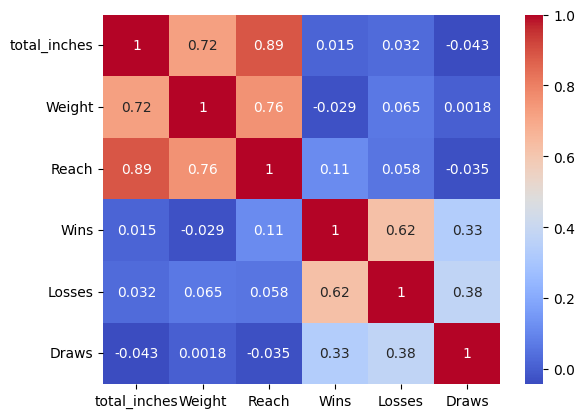

In [31]:
corr_matrix
# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()